## **Data Exploratory Analysis**

In [1]:
import pandas as pd
import librosa as lr
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio
from sklearn.utils import resample
import seaborn as sns
from sklearn.model_selection import train_test_split
import os, fnmatch

In [2]:
# from google,colab import drive
# drive.mount('/content/drive/')

In [62]:
! pip install gdown

In [70]:
! gdown 1N2Ru1N_y-fT7LiTHjahVrKrNVskOYPl2

Downloading...
From: https://drive.google.com/uc?id=1N2Ru1N_y-fT7LiTHjahVrKrNVskOYPl2
To: /kaggle/working/no-noise.zip
100%|████████████████████████████████████████| 187M/187M [00:04<00:00, 41.2MB/s]


In [71]:
! unzip /kaggle/working/no-noise.zip

Archive:  /kaggle/working/no-noise.zip
  inflating: extrastole__130_1306347376079_D.wav  
  inflating: extrastole__144_1306522408528_B.wav  
  inflating: extrahls__201101091153.wav  
  inflating: extrahls__201102070251.wav  
  inflating: extrastole__148_1306768801551_B.wav  
  inflating: extrastole__127_1306764300147_C2.wav  
  inflating: extrahls__201104021355.wav  
  inflating: extrahls__201103170134.wav  
  inflating: extrahls__201104140118.wav  
  inflating: extrahls__201102071835.wav  
  inflating: extrahls__201103150114.wav  
  inflating: extrahls__201104270459.wav  
  inflating: extrahls__201101160804.wav  
  inflating: extrastole__134_1306428161797_C1.wav  
  inflating: extrahls__201101070953.wav  
  inflating: extrastole__151_1306779785624_B.wav  
  inflating: extrastole__128_1306344005749_A.wav  
  inflating: extrahls__201103182227.wav  
  inflating: extrastole__179_1307990076841_C.wav  
  inflating: extrastole__138_1306762146980_B.wav  
  inflating: extrahls__201101241433.wa

In [67]:
! rm -rf /kaggle/working/15gpddyMLt9x9EXYwN6-KcZ4YSqSPerBv?usp=share_link

https://drive.google.com/drive/folders/15gpddyMLt9x9EXYwN6-KcZ4YSqSPerBv?usp=share_link

In [4]:
acsv = ROOT +'/set_a.csv'
bcsv = ROOT + '/set_b.csv'
a_timingcsv = ROOT + '/set_a_timing.csv'

In [5]:
setA = pd.read_csv(acsv)
setB = pd.read_csv(bcsv)
setAtiming = pd.read_csv(a_timingcsv)

Understanding the data

In [6]:
print(setA.head(-1))

    dataset                             fname     label  sublabel
0         a  set_a/artifact__201012172012.wav  artifact       NaN
1         a  set_a/artifact__201105040918.wav  artifact       NaN
2         a  set_a/artifact__201105041959.wav  artifact       NaN
3         a  set_a/artifact__201105051017.wav  artifact       NaN
4         a  set_a/artifact__201105060108.wav  artifact       NaN
..      ...                               ...       ...       ...
170       a          set_a/__201108222234.wav       NaN       NaN
171       a          set_a/__201108222241.wav       NaN       NaN
172       a          set_a/__201108222244.wav       NaN       NaN
173       a          set_a/__201108222247.wav       NaN       NaN
174       a          set_a/__201108222254.wav       NaN       NaN

[175 rows x 4 columns]


In [7]:
print(setB.head(-1))

    dataset                                              fname       label  \
0         b  set_b/Btraining_extrastole_127_1306764300147_C...  extrastole   
1         b  set_b/Btraining_extrastole_128_1306344005749_A...  extrastole   
2         b  set_b/Btraining_extrastole_130_1306347376079_D...  extrastole   
3         b  set_b/Btraining_extrastole_134_1306428161797_C...  extrastole   
4         b  set_b/Btraining_extrastole_138_1306762146980_B...  extrastole   
..      ...                                                ...         ...   
650       b  set_b/Btraining_normal_Btraining_noisynormal_2...      normal   
651       b  set_b/Btraining_normal_Btraining_noisynormal_2...      normal   
652       b  set_b/Btraining_normal_Btraining_noisynormal_2...      normal   
653       b  set_b/Btraining_normal_Btraining_noisynormal_2...      normal   
654       b  set_b/Btraining_normal_Btraining_noisynormal_2...      normal   

        sublabel  
0            NaN  
1            NaN  
2     

In [8]:
print(setAtiming.head(-1))

                              fname  cycle sound  location
0    set_a/normal__201102081321.wav      1    S1     10021
1    set_a/normal__201102081321.wav      1    S2     20759
2    set_a/normal__201102081321.wav      2    S1     35075
3    set_a/normal__201102081321.wav      2    S2     47244
4    set_a/normal__201102081321.wav      3    S1     62992
..                              ...    ...   ...       ...
384  set_a/normal__201108011118.wav     10    S1    272527
385  set_a/normal__201108011118.wav     10    S2    284673
386  set_a/normal__201108011118.wav     11    S1    300863
387  set_a/normal__201108011118.wav     11    S2    314279
388  set_a/normal__201108011118.wav     12    S1    330980

[389 rows x 4 columns]


In [9]:
setA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   dataset   176 non-null    object 
 1   fname     176 non-null    object 
 2   label     124 non-null    object 
 3   sublabel  0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 5.6+ KB


In [10]:
setB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656 entries, 0 to 655
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   dataset   656 non-null    object
 1   fname     656 non-null    object
 2   label     461 non-null    object
 3   sublabel  149 non-null    object
dtypes: object(4)
memory usage: 20.6+ KB


In [11]:
setAtiming.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   fname     390 non-null    object
 1   cycle     390 non-null    int64 
 2   sound     390 non-null    object
 3   location  390 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 12.3+ KB


In [12]:
setB.describe()

,dataset,fname,label,sublabel
count,656,656,461,149
unique,1,656,3,2
top,b,set_b/Btraining_extrastole_127_1306764300147_C...,normal,noisynormal
freq,656,1,320,120


In [13]:
setAtiming.describe()

,cycle,location
count,390.000000,390.000000
mean,5.733333,164639.984615
std,3.732807,99310.875752
min,1.000000,2583.000000
25%,3.000000,82313.000000
50%,5.000000,155624.500000
75%,8.000000,239709.750000
max,19.000000,390873.000000


In [14]:
print(setA["label"].value_counts())

artifact    40
murmur      34
normal      31
extrahls    19
Name: label, dtype: int64


In [15]:
print(setA["label"].value_counts().sum())

124


In [16]:
print(setA["label"].isnull().sum())

52


In [17]:
# check to see if they are the same amount
print(setAtiming['sound'].value_counts())

S1    195
S2    195
Name: sound, dtype: int64


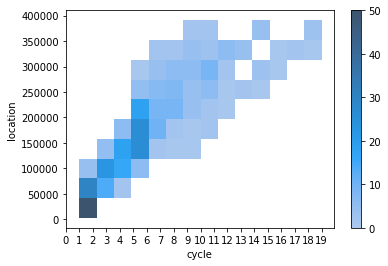

In [18]:
g= sns.histplot(data=setAtiming, x="cycle", y="location", cbar=True)
g.set_xticks(range(20))

Editing the data

In [19]:
# we will drop the entries with artifact as label since it is not one of the needed classifications
setA = setA[setA.label != 'artifact']

In [20]:
# we will drop the entries with null as the label
setA = setA.dropna(subset=['label'])
setA.head(-1)

,dataset,fname,label,sublabel
40,a,set_a/extrahls__201101070953.wav,extrahls,NaN
41,a,set_a/extrahls__201101091153.wav,extrahls,NaN
42,a,set_a/extrahls__201101152255.wav,extrahls,NaN
43,a,set_a/extrahls__201101160804.wav,extrahls,NaN
44,a,set_a/extrahls__201101160808.wav,extrahls,NaN
...,...,...,...,...
118,a,set_a/normal__201106221418.wav,normal,NaN
119,a,set_a/normal__201106221450.wav,normal,NaN
120,a,set_a/normal__201108011112.wav,normal,NaN
121,a,set_a/normal__201108011114.wav,normal,NaN


In [21]:
print(setA["label"].value_counts())
# now set A has 3 classifications

murmur      34
normal      31
extrahls    19
Name: label, dtype: int64


In [22]:
# we will drop the entries with null as the label
setB = setB.dropna(subset=['label'])
setB.head(-1)

,dataset,fname,label,sublabel
0,b,set_b/Btraining_extrastole_127_1306764300147_C...,extrastole,NaN
1,b,set_b/Btraining_extrastole_128_1306344005749_A...,extrastole,NaN
2,b,set_b/Btraining_extrastole_130_1306347376079_D...,extrastole,NaN
3,b,set_b/Btraining_extrastole_134_1306428161797_C...,extrastole,NaN
4,b,set_b/Btraining_extrastole_138_1306762146980_B...,extrastole,NaN
...,...,...,...,...
650,b,set_b/Btraining_normal_Btraining_noisynormal_2...,normal,noisynormal
651,b,set_b/Btraining_normal_Btraining_noisynormal_2...,normal,noisynormal
652,b,set_b/Btraining_normal_Btraining_noisynormal_2...,normal,noisynormal
653,b,set_b/Btraining_normal_Btraining_noisynormal_2...,normal,noisynormal


In [23]:
print(setB["label"].value_counts())
# set B has 3 classifications

normal        320
murmur         95
extrastole     46
Name: label, dtype: int64


In [24]:
# will need all 4 categories together to be able to classify, so will join both sets A and B
setAB = [setA,setB]
ABdf = pd.concat(setAB)
print(ABdf.head(-1))

    dataset                                              fname     label  \
40        a                   set_a/extrahls__201101070953.wav  extrahls   
41        a                   set_a/extrahls__201101091153.wav  extrahls   
42        a                   set_a/extrahls__201101152255.wav  extrahls   
43        a                   set_a/extrahls__201101160804.wav  extrahls   
44        a                   set_a/extrahls__201101160808.wav  extrahls   
..      ...                                                ...       ...   
650       b  set_b/Btraining_normal_Btraining_noisynormal_2...    normal   
651       b  set_b/Btraining_normal_Btraining_noisynormal_2...    normal   
652       b  set_b/Btraining_normal_Btraining_noisynormal_2...    normal   
653       b  set_b/Btraining_normal_Btraining_noisynormal_2...    normal   
654       b  set_b/Btraining_normal_Btraining_noisynormal_2...    normal   

        sublabel  
40           NaN  
41           NaN  
42           NaN  
43         

In [25]:
print(ABdf["label"].value_counts())

normal        351
murmur        129
extrastole     46
extrahls       19
Name: label, dtype: int64


Distribution of each class

<AxesSubplot:>

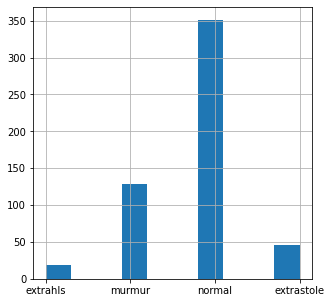

In [26]:
ABdf['label'].hist(figsize=(5, 5))

The data is very unbalanced, so we will upsample extrahls and extrastole and downsample normal

In [27]:
df_murmur = ABdf[ABdf.label == 'murmur']
df_extrastole = ABdf[ABdf.label == 'extrastole']
df_extrahls = ABdf[ABdf.label == 'extrahls']
df_normal = ABdf[ABdf.label == 'normal']
 
# Upsample minority classes
df_exhals_upsampled = resample(df_extrahls, replace=True, n_samples=129)    # to match murmur class
df_extrastole_upsampled = resample(df_extrastole, replace=True, n_samples=129)
# Downsample majority class
df_normal_downsampled = resample(df_normal, replace=False, n_samples=129)                               

# Combine classes
df_upsampled = pd.concat([df_murmur, df_exhals_upsampled])
df_upsampled = pd.concat([df_upsampled, df_extrastole_upsampled])
ABdf = pd.concat([df_upsampled, df_normal_downsampled])

ABdf.label.value_counts()

murmur        129
extrahls      129
extrastole    129
normal        129
Name: label, dtype: int64

<AxesSubplot:>

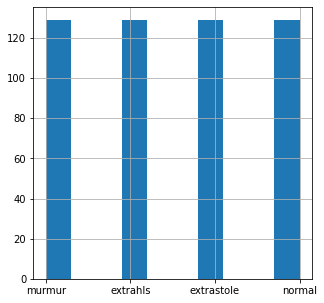

In [28]:
ABdf['label'].hist(figsize=(5, 5))

In [29]:
ABdf.head(-1)

,dataset,fname,label,sublabel
59,a,set_a/murmur__201101051104.wav,murmur,NaN
60,a,set_a/murmur__201101051108.wav,murmur,NaN
61,a,set_a/murmur__201101051114.wav,murmur,NaN
62,a,set_a/murmur__201101180902.wav,murmur,NaN
63,a,set_a/murmur__201102051443.wav,murmur,NaN
...,...,...,...,...
615,b,set_b/Btraining_normal_Btraining_noisynormal_1...,normal,noisynormal
168,b,set_b/Btraining_normal_149_1306776016110_C1.wav,normal,NaN
220,b,set_b/Btraining_normal_181_1308052613891_B.wav,normal,NaN
189,b,set_b/Btraining_normal_159_1307018640315_C1.wav,normal,NaN


In [30]:
ABdf = ABdf.reset_index()
print(ABdf.head(-1))

     index dataset                                              fname   label  \
0       59       a                     set_a/murmur__201101051104.wav  murmur   
1       60       a                     set_a/murmur__201101051108.wav  murmur   
2       61       a                     set_a/murmur__201101051114.wav  murmur   
3       62       a                     set_a/murmur__201101180902.wav  murmur   
4       63       a                     set_a/murmur__201102051443.wav  murmur   
..     ...     ...                                                ...     ...   
510    615       b  set_b/Btraining_normal_Btraining_noisynormal_1...  normal   
511    168       b    set_b/Btraining_normal_149_1306776016110_C1.wav  normal   
512    220       b     set_b/Btraining_normal_181_1308052613891_B.wav  normal   
513    189       b    set_b/Btraining_normal_159_1307018640315_C1.wav  normal   
514    603       b  set_b/Btraining_normal_Btraining_noisynormal_1...  normal   

        sublabel  
0       

Looking at the audio signals of each class

In [31]:
dir = ROOT + '/'

In [32]:
# making a new dataframe with just the audio and its label
audioList = []
labels = []
for j in range(516):
  if('Btraining_extrastole' in ABdf['fname'][j]):
    alteredPathName = ABdf['fname'][j].replace('Btraining_extrastole', 'extrastole_')
    #print(alteredPathName)
    audioList.append(dir + alteredPathName)
    labels.append(ABdf["label"][j])
  elif('Btraining_normal_Btraining_' in ABdf['fname'][j]):
    alteredPathName = ABdf['fname'][j].replace('Btraining_normal_Btraining_', 'normal_')
    audioList.append(dir + alteredPathName)
    labels.append(ABdf["label"][j])
  elif('Btraining_normal' in ABdf['fname'][j]):
    alteredPathName = ABdf['fname'][j].replace('Btraining_normal', 'normal_')
    audioList.append(dir + alteredPathName)
    labels.append(ABdf["label"][j])
  elif('Btraining_murmur_Btraining_' in ABdf['fname'][j]):
    alteredPathName = ABdf['fname'][j].replace('Btraining_murmur_Btraining_', 'murmur_')
    audioList.append(dir + alteredPathName)
    labels.append(ABdf["label"][j])
  elif('Btraining_murmur' in ABdf['fname'][j]):
    alteredPathName = ABdf['fname'][j].replace('Btraining_murmur', 'murmur_')
    audioList.append(dir + alteredPathName)
    labels.append(ABdf["label"][j])
  else:
    audioList.append(dir + str(ABdf["fname"][j]))
    labels.append(ABdf["label"][j])

In [33]:
print(audioList)
print(len(audioList))
print(len(labels))

['/kaggle/input/heartbeat-sounds/set_a/murmur__201101051104.wav', '/kaggle/input/heartbeat-sounds/set_a/murmur__201101051108.wav', '/kaggle/input/heartbeat-sounds/set_a/murmur__201101051114.wav', '/kaggle/input/heartbeat-sounds/set_a/murmur__201101180902.wav', '/kaggle/input/heartbeat-sounds/set_a/murmur__201102051443.wav', '/kaggle/input/heartbeat-sounds/set_a/murmur__201102052338.wav', '/kaggle/input/heartbeat-sounds/set_a/murmur__201103291548.wav', '/kaggle/input/heartbeat-sounds/set_a/murmur__201104021355.wav', '/kaggle/input/heartbeat-sounds/set_a/murmur__201104241315.wav', '/kaggle/input/heartbeat-sounds/set_a/murmur__201104291843.wav', '/kaggle/input/heartbeat-sounds/set_a/murmur__201106141148.wav', '/kaggle/input/heartbeat-sounds/set_a/murmur__201108222221.wav', '/kaggle/input/heartbeat-sounds/set_a/murmur__201108222223.wav', '/kaggle/input/heartbeat-sounds/set_a/murmur__201108222224.wav', '/kaggle/input/heartbeat-sounds/set_a/murmur__201108222226.wav', '/kaggle/input/heartbeat

In [34]:
audioListSeries = pd.Series(audioList,name="Audio")
labelsSeries = pd.Series(labels,name="Label")
audioDF = pd.concat([audioListSeries,labelsSeries],axis=1)

In [35]:
audioDF['Label'].value_counts()

murmur        129
extrahls      129
extrastole    129
normal        129
Name: Label, dtype: int64

In [36]:
audioDF.head(-1)

,Audio,Label
0,/kaggle/input/heartbeat-sounds/set_a/murmur__2...,murmur
1,/kaggle/input/heartbeat-sounds/set_a/murmur__2...,murmur
2,/kaggle/input/heartbeat-sounds/set_a/murmur__2...,murmur
3,/kaggle/input/heartbeat-sounds/set_a/murmur__2...,murmur
4,/kaggle/input/heartbeat-sounds/set_a/murmur__2...,murmur
...,...,...
510,/kaggle/input/heartbeat-sounds/set_b/normal_no...,normal
511,/kaggle/input/heartbeat-sounds/set_b/normal__1...,normal
512,/kaggle/input/heartbeat-sounds/set_b/normal__1...,normal
513,/kaggle/input/heartbeat-sounds/set_b/normal__1...,normal


/kaggle/input/heartbeat-sounds/set_a/extrahls__201102070251.wav
129


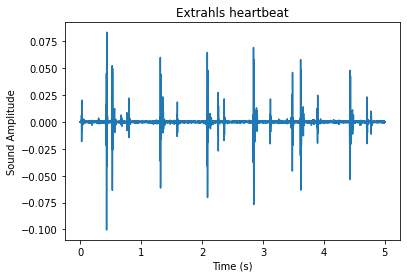

In [37]:
i = 0
while('extrahls' not in audioDF['Audio'][i]):
  i+=1
print(audioDF['Audio'][i])
print(i)

audio, audio_sfreq = lr.load(audioDF['Audio'][i], duration=5)
time = np.arange(0, len(audio)) / audio_sfreq
# Plot audio over time
fig, ax = plt.subplots()
ax.plot(time, audio)
ax.set(xlabel='Time (s)', ylabel='Sound Amplitude')
ax.set_title('Extrahls heartbeat')
plt.show()
Audio(audio,rate=audio_sfreq)

In [38]:
dur=lr.get_duration(audio)
print ("duration:", dur)
print(audio.shape, audio_sfreq)

duration: 5.0
(110250,) 22050


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Pass y=[-2.1278996e-04 -4.0110268e-04 -2.4642280e-04 ...  8.8464280e-05
 -6.5654258e-06  2.1285593e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  """Entry point for launching an IPython kernel.


/kaggle/input/heartbeat-sounds/set_a/murmur__201101051104.wav
0


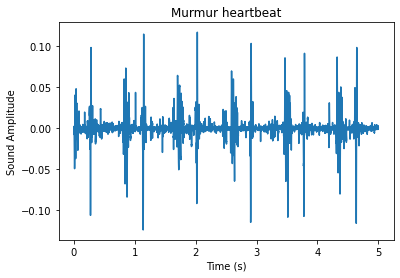

In [39]:
i = 0
while('murmur' not in audioDF['Audio'][i]):
  i+=1
print(audioDF['Audio'][i])
print(i)

audio, audio_sfreq = lr.load(audioDF['Audio'][i], duration=5)
time = np.arange(0, len(audio)) / audio_sfreq
# Plot audio over time
fig, ax = plt.subplots()
ax.plot(time, audio)
ax.set(xlabel='Time (s)', ylabel='Sound Amplitude')
ax.set_title('Murmur heartbeat')
plt.show()
Audio(audio,rate=audio_sfreq)
#print(audio,audio_sfreq)

In [40]:
dur=lr.get_duration(audio)
print ("duration:", dur)
print(audio.shape, audio_sfreq)

duration: 5.0
(110250,) 22050


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Pass y=[-0.00529056 -0.00752499 -0.00610133 ...  0.00093688  0.00056159
  0.00031823] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  """Entry point for launching an IPython kernel.


/kaggle/input/heartbeat-sounds/set_b/normal_noisynormal_113_1306244002866_B.wav
387


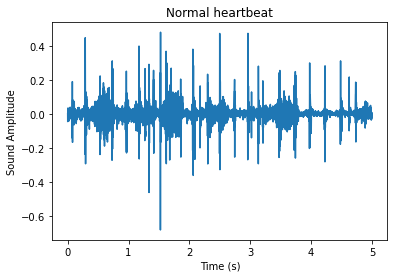

In [41]:
i = 0
while('normal' not in audioDF['Audio'][i]):
  i+=1
print(audioDF['Audio'][i])
print(i)

audio, audio_sfreq = lr.load(audioDF['Audio'][i], duration=5)
time = np.arange(0, len(audio)) / audio_sfreq
# Plot audio over time
fig, ax = plt.subplots()
ax.plot(time, audio)
ax.set(xlabel='Time (s)', ylabel='Sound Amplitude')
ax.set_title('Normal heartbeat')
plt.show()
Audio(audio,rate=audio_sfreq)

In [42]:
dur=lr.get_duration(audio)
print ("duration:", dur)
print(audio.shape, audio_sfreq)

duration: 5.0
(110250,) 22050


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Pass y=[ 0.00115006 -0.00056426 -0.00322265 ... -0.00576862 -0.00379268
 -0.00201583] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  """Entry point for launching an IPython kernel.


/kaggle/input/heartbeat-sounds/set_b/extrastole__148_1306768801551_B.wav
258


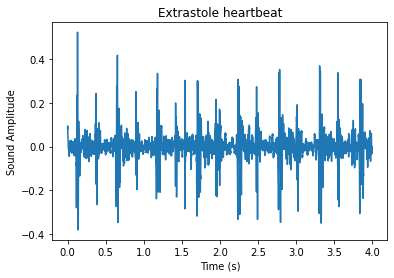

In [43]:
i = 0
while('extrastole' not in audioDF['Audio'][i]):
  i+=1
print(audioDF['Audio'][i])
print(i)

audio, audio_sfreq = lr.load(audioDF['Audio'][i], duration=5)
time = np.arange(0, len(audio)) / audio_sfreq
# Plot audio over time
fig, ax = plt.subplots()
ax.plot(time, audio)
ax.set(xlabel='Time (s)', ylabel='Sound Amplitude')
ax.set_title('Extrastole heartbeat')
plt.show()
Audio(audio,rate=audio_sfreq)

In [44]:
# function to stretch the time of the signal
def stretch_function(data,rate=0.5):
    return lr.effects.time_stretch(data,rate)

In [45]:
word = ABdf['fname'][258].replace('Btraining_extrastole', 'extrastole_')
wav_type,sample_rate = lr.load(dir + word)
stretch_audio = stretch_function(wav_type)
Audio(stretch_audio,rate=sample_rate)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Pass rate=0.5 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  This is separate from the ipykernel package so we can avoid doing imports until


# **Data Splitting**

For Task a

In [46]:
setAtimingX = setAtiming.drop(['location'], axis=1)
print(setAtimingX)
x_traina, x_testa, y_traina, y_testa = train_test_split(setAtimingX, setAtiming['location'], train_size=0.85, shuffle=True)
x_traina, x_vala, y_traina, y_vala = train_test_split(x_traina, y_traina, test_size=0.176, shuffle=True)

                              fname  cycle sound
0    set_a/normal__201102081321.wav      1    S1
1    set_a/normal__201102081321.wav      1    S2
2    set_a/normal__201102081321.wav      2    S1
3    set_a/normal__201102081321.wav      2    S2
4    set_a/normal__201102081321.wav      3    S1
..                              ...    ...   ...
385  set_a/normal__201108011118.wav     10    S2
386  set_a/normal__201108011118.wav     11    S1
387  set_a/normal__201108011118.wav     11    S2
388  set_a/normal__201108011118.wav     12    S1
389  set_a/normal__201108011118.wav     12    S2

[390 rows x 3 columns]


In [47]:
print("x test = " + str(x_testa.size))
print("x test shape = " + str(x_testa.shape))
print("y test = " + str(y_testa.size))
print("x train = " + str(x_traina.size))
print("x train shape = " + str(x_traina.shape))
print("y train = " + str(y_traina.size))
print("x val = " + str(x_vala.size))
print("x validation shape = " + str(x_vala.shape))
print("y val = " + str(y_vala.size))

x test = 177
x test shape = (59, 3)
y test = 59
x train = 816
x train shape = (272, 3)
y train = 272
x val = 177
x validation shape = (59, 3)
y val = 59


In [48]:
print(x_traina)

                              fname  cycle sound
31   set_a/normal__201102260502.wav      4    S2
247  set_a/normal__201106111136.wav      6    S2
318  set_a/normal__201108011112.wav      2    S1
51   set_a/normal__201103090635.wav      6    S2
92   set_a/normal__201103140822.wav      5    S1
..                              ...    ...   ...
9    set_a/normal__201102081321.wav      5    S2
91   set_a/normal__201103140822.wav      4    S2
159  set_a/normal__201105011626.wav     12    S2
155  set_a/normal__201105011626.wav     10    S2
215  set_a/normal__201105021804.wav     14    S2

[272 rows x 3 columns]


For Task b

In [49]:
Xb = audioDF['Audio']
Yb = audioDF['Label']

In [50]:
print(Xb)

0      /kaggle/input/heartbeat-sounds/set_a/murmur__2...
1      /kaggle/input/heartbeat-sounds/set_a/murmur__2...
2      /kaggle/input/heartbeat-sounds/set_a/murmur__2...
3      /kaggle/input/heartbeat-sounds/set_a/murmur__2...
4      /kaggle/input/heartbeat-sounds/set_a/murmur__2...
                             ...                        
511    /kaggle/input/heartbeat-sounds/set_b/normal__1...
512    /kaggle/input/heartbeat-sounds/set_b/normal__1...
513    /kaggle/input/heartbeat-sounds/set_b/normal__1...
514    /kaggle/input/heartbeat-sounds/set_b/normal_no...
515    /kaggle/input/heartbeat-sounds/set_a/normal__2...
Name: Audio, Length: 516, dtype: object


In [51]:
print(Yb)

0      murmur
1      murmur
2      murmur
3      murmur
4      murmur
        ...  
511    normal
512    normal
513    normal
514    normal
515    normal
Name: Label, Length: 516, dtype: object


In [52]:
x_trainb, x_testb, y_trainb, y_testb = train_test_split(Xb, Yb, train_size=0.85, shuffle=True)
x_trainb, x_valb, y_trainb, y_valb = train_test_split(x_trainb, y_trainb, test_size=0.176, shuffle=True)

In [53]:
print("x test = " + str(x_testb.size))
print("y test = " + str(y_testb.size))
print("x train = " + str(x_trainb.size))
print("y train = " + str(y_trainb.size))
print("x val = " + str(x_valb.size))
print("y val = " + str(y_valb.size))

x test = 78
y test = 78
x train = 360
y train = 360
x val = 78
y val = 78


## Data preparation

In [54]:
MAX_SOUND_CLIP_DURATION = 12

In [55]:
def load_file_data (file_names, duration=12, sr=22050):
    input_length=sr*duration
    # function to load files and extract features
    data = []    
    for file_name in file_names:
        try:
            sound_file=file_name
            print ("load file ",sound_file)
            X, sr = lr.load( sound_file, sr=sr, duration=duration) 
            dur = lr.get_duration(y=X, sr=sr)
            # pad audio file same duration
            if (round(dur) < duration):
                print ("fixing audio length :", file_name)
                y = lr.util.fix_length(X, input_length)                          
            # extract normalized mfcc feature from data
            mfccs = np.mean(lr.feature.mfcc(y=X, sr=sr, n_mfcc=40).T,axis=0)             
        except Exception as e:
            print("Error encountered while parsing file: ", file_name)        
        feature = np.array(mfccs).reshape([-1,1])
        data.append(feature)
    return data

In [56]:
FILES = x_trainb.values
x_trainb_pad = load_file_data(file_names=FILES, duration=MAX_SOUND_CLIP_DURATION)
FILES = x_valb.values
X_valb_pad = load_file_data(file_names=FILES, duration=MAX_SOUND_CLIP_DURATION)
FILES = x_testb.values
X_testb_pad = load_file_data(file_names=FILES, duration=MAX_SOUND_CLIP_DURATION)


load file  /kaggle/input/heartbeat-sounds/set_a/extrahls__201103182227.wav
fixing audio length : /kaggle/input/heartbeat-sounds/set_a/extrahls__201103182227.wav
load file  /kaggle/input/heartbeat-sounds/set_b/extrastole__127_1306764300147_C2.wav


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Pass size=264600 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  


fixing audio length : /kaggle/input/heartbeat-sounds/set_b/extrastole__127_1306764300147_C2.wav
load file  /kaggle/input/heartbeat-sounds/set_b/normal__103_1305031931979_D1.wav
fixing audio length : /kaggle/input/heartbeat-sounds/set_b/normal__103_1305031931979_D1.wav
load file  /kaggle/input/heartbeat-sounds/set_b/murmur__112_1306243000964_A.wav
fixing audio length : /kaggle/input/heartbeat-sounds/set_b/murmur__112_1306243000964_A.wav
load file  /kaggle/input/heartbeat-sounds/set_b/normal_noisynormal_163_1307104470471_D1.wav
fixing audio length : /kaggle/input/heartbeat-sounds/set_b/normal_noisynormal_163_1307104470471_D1.wav
load file  /kaggle/input/heartbeat-sounds/set_b/normal_noisynormal_108_1305654420093_A.wav
fixing audio length : /kaggle/input/heartbeat-sounds/set_b/normal_noisynormal_108_1305654420093_A.wav
load file  /kaggle/input/heartbeat-sounds/set_b/extrastole__190_1308076920011_C.wav
fixing audio length : /kaggle/input/heartbeat-sounds/set_b/extrastole__190_1308076920011

In [57]:
np.unique(Yb,return_counts=True)

(array(['extrahls', 'extrastole', 'murmur', 'normal'], dtype=object),
 array([129, 129, 129, 129]))

In [58]:
np.array(x_trainb_pad).shape,np.array(X_valb_pad).shape,np.array(X_testb_pad).shape

((360, 40, 1), (78, 40, 1), (78, 40, 1))

In [59]:
# labels
# Classes [murmur,normal,ehtrahs,extrasoles]


def encode(y):
    labels = {
        'murmur'     : np.array([1,0,0,0]),
        'normal'     : np.array([0,1,0,0]),
        'extrahls'   : np.array([0,0,1,0]),
        'extrastole' : np.array([0,0,0,1]),
    }
    y_new = np.zeros(y.shape + (4,))
    for i,label in enumerate(y):
        y_new[i] = labels[label]
    return y_new

In [60]:
y_trainb_encoded = encode(y_trainb)
y_valb_encoded = encode(y_valb)
y_testb_encoded = encode(y_testb)

In [ ]:
np.array(y_trainb_encoded).shape,np.array(y_valb_encoded).shape,np.array(y_testb_encoded).shape

## Model 


In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers as tfl


In [ ]:
checkpoint_filepath = '/kaggle/working/checkpoints/'

In [ ]:
del model

In [ ]:
values = np.arange(0.000001,0.0003,0.00002)[::-1]
# values = np.array([0.00003,0.00005,0.00007,0.00009,0.0001,0.0003])[::-1]
boundaries = np.arange(10, 600,35)[:values.shape[0]-1]


scheduler = keras.optimizers.schedules.PiecewiseConstantDecay(
    list(boundaries), list(values))

lrscheduler = tf.keras.callbacks.LearningRateScheduler(scheduler,verbose=1)

In [ ]:
model = keras.models.Sequential([
    tfl.Flatten(input_shape=(40,1,)),
    tfl.Dense(2048,activation='relu'),
    tfl.Dense(512,activation='relu'),

    tfl.Dense(4,activation='sigmoid')
],name='ClassifierA')
optimizer = keras.optimizers.Adam()
loss = keras.losses.CategoricalCrossentropy()
model.compile(optimizer=optimizer,loss=loss,metrics=['accuracy'])
model.summary()

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience = 3, mode='min')
checkpoint = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

history=model.fit(
    x=np.array(x_trainb_pad),
    y=y_trainb_encoded,epochs=500,
    validation_data=(np.array(X_valb_pad),y_valb_encoded),
    callbacks=[lrscheduler,checkpoint]
)

In [ ]:
num=len(history.history['loss'])

plt.plot(range(num),history.history['loss'],label = 'training loss')
plt.plot(range(num),history.history['val_loss'],label = 'validation loss')

plt.legend()

plt.xlabel("Epochs ")
plt.ylabel('Loss')

plt.figure()

plt.plot(range(num),history.history['accuracy'],label = 'training accuracy')
plt.plot(range(num),history.history['val_accuracy'],label = 'validation accuracy')

plt.legend()
plt.xlabel("Epochs ")

## Adding regularization

In [ ]:
model_reg = keras.models.Sequential([
    tfl.Flatten(input_shape=(40,1,)),
    tfl.Dense(2048,activation='relu'),
    tfl.Dense(512,activation='relu'),
    tfl.Dropout(0.2),
    tfl.Dense(4,activation='sigmoid')
],name='ClassifierA')

model_reg.compile(optimizer=optimizer,loss=loss,metrics=['accuracy'])
model_reg.summary()

In [ ]:
checkpoint_filepath = '/kaggle/working/checkpoints/model_reg/'
checkpoint = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

history=model_reg.fit(
    x=np.array(x_trainb_pad),
    y=y_trainb_encoded,epochs=500,
    validation_data=(np.array(X_valb_pad),y_valb_encoded),
    callbacks=[lrscheduler,checkpoint]
)

In [ ]:
num=len(history.history['loss'])

plt.plot(range(num),history.history['loss'],label = 'training loss')
plt.plot(range(num),history.history['val_loss'],label = 'validation loss')

plt.legend()

plt.xlabel("Epochs ")
plt.ylabel('Loss')

plt.figure()

plt.plot(range(num),history.history['accuracy'],label = 'training accuracy')
plt.plot(range(num),history.history['val_accuracy'],label = 'validation accuracy')

plt.legend()
plt.xlabel("Epochs ")

Model without regularization is much better so we discard this one.

## Evaluation

## Accuracy

In [ ]:
model.load_weights(checkpoint_filepath)
model.evaluate(np.array(X_testb_pad),y_testb_encoded)

In [ ]:
y_pred = model.predict(np.array(X_testb_pad))
y_pred_max = np.argsort(y_pred,axis=-1)[:,::-1][:,0]
y_true_max = np.argsort(y_testb_encoded,axis=-1)[:,::-1][:,0]

## F1 score

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_true_max, y_pred_max, average='micro')

## AUC

In [ ]:
m = tf.keras.metrics.AUC(num_thresholds=80)
m.update_state(y_testb_encoded, y_pred)

m.result().numpy()


## Confusion Matrix

In [ ]:
import seaborn as sns

conf = tf.math.confusion_matrix(y_pred_max,y_true_max)

sns.heatmap(conf,annot=True)

# Model : CNN

In [ ]:
model_cnn = keras.models.Sequential([
#     tfl.Flatten(input_shape=(40,1)),
    tfl.Conv1D(64,3,activation='relu',padding='same',input_shape=(40,1)),
    tfl.Conv1D(64,3,activation='relu',padding='same'),
    tfl.MaxPool1D(2,2),
    tfl.Conv1D(32,3,activation='relu',padding='same'),
    tfl.Conv1D(32,3,activation='relu',padding='same'),
    tfl.MaxPool1D(2,2),
    tfl.Flatten(),
    tfl.Dense(64,activation='relu'),
    tfl.Dense(4,activation='sigmoid'),

])

model_cnn.compile(optimizer=optimizer,loss=loss,metrics=['accuracy'])
model_cnn.summary()

In [ ]:
del model_cnn

In [ ]:
checkpoint_filepath_cnn = '/kaggle/working/checkpoints/cnn/'
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience = 35, mode='min')

checkpoint = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath_cnn,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

history=model_cnn.fit(
    x=np.array(x_trainb_pad),
    y=y_trainb_encoded,epochs=500,
    validation_data=(np.array(X_valb_pad),y_valb_encoded),
    callbacks=[lrscheduler,checkpoint,early_stopping]
)

In [ ]:
num=len(history.history['loss'])

plt.plot(range(num),history.history['loss'],label = 'training loss')
plt.plot(range(num),history.history['val_loss'],label = 'validation loss')

plt.legend()

plt.xlabel("Epochs ")
plt.ylabel('Loss')

plt.figure()

plt.plot(range(num),history.history['accuracy'],label = 'training accuracy')
plt.plot(range(num),history.history['val_accuracy'],label = 'validation accuracy')

plt.legend()
plt.xlabel("Epochs ")

In [ ]:
model_cnn = keras.models.Sequential([
    tfl.Conv1D(64,3,activation='relu',padding='same',input_shape=(40,1)),
    tfl.Conv1D(64,3,activation='relu',padding='same'),
    tfl.MaxPool1D(2,2),
    tfl.BatchNormalization(),
    tfl.Conv1D(32,3,activation='relu',padding='same'),
    tfl.Conv1D(32,3,activation='relu',padding='same'),
    tfl.MaxPool1D(2,2),
    tfl.BatchNormalization(),
    tfl.Flatten(),
    tfl.Dropout(0.2),
    tfl.Dense(64,activation='relu'),
    tfl.Dropout(0.2),
    tfl.Dense(4,activation='sigmoid'),

])

model_cnn.compile(optimizer=optimizer,loss=loss,metrics=['accuracy'])
model_cnn.summary()

In [ ]:
checkpoint_filepath_cnn = '/kaggle/working/checkpoints/cnn/reg'
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience = 35, mode='min')

checkpoint = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

history=model_cnn.fit(
    x=np.array(x_trainb_pad),
    y=y_trainb_encoded,epochs=500,
    validation_data=(np.array(X_valb_pad),y_valb_encoded),
    callbacks=[lrscheduler,checkpoint]
)

In [ ]:
num=len(history.history['loss'])

plt.plot(range(num),history.history['loss'],label = 'training loss')
plt.plot(range(num),history.history['val_loss'],label = 'validation loss')

plt.legend()

plt.xlabel("Epochs ")
plt.ylabel('Loss')

plt.figure()

plt.plot(range(num),history.history['accuracy'],label = 'training accuracy')
plt.plot(range(num),history.history['val_accuracy'],label = 'validation accuracy')

plt.legend()
plt.xlabel("Epochs ")

first model is better

In [ ]:
model_cnn.load_weights(checkpoint_filepath_cnn)
model_cnn.evaluate(np.array(X_valb_pad),y_valb_encoded)

# Evaluate

In [ ]:
model_cnn.evaluate(np.array(X_testb_pad),y_testb_encoded)

In [ ]:
y_pred = model_cnn.predict(np.array(X_testb_pad))
y_pred_max = np.argsort(y_pred,axis=-1)[:,::-1][:,0]
y_true_max = np.argsort(y_testb_encoded,axis=-1)[:,::-1][:,0]


In [ ]:
from sklearn.metrics import f1_score

f1_score(y_true_max, y_pred_max, average='micro')

In [ ]:
m = tf.keras.metrics.AUC(num_thresholds=80)
m.update_state(y_testb_encoded, y_pred)

m.result().numpy()

In [ ]:
import seaborn as sns

conf = tf.math.confusion_matrix(y_pred_max,y_true_max)

sns.heatmap(conf,annot=True)

## Working on non noisy data

In [ ]:
ROOT = '/kaggle/working/no-noise'